In [5]:


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error, r2_score


In [17]:
# Đọc dữ liệu từ tập tin CSV
df = pd.read_csv('LG.csv')


In [18]:
# Chuyển cột 'Date' sang định dạng datetime
df['Date'] = pd.to_datetime(df['Date'])

In [19]:
# Thiết lập cột 'Date' làm chỉ số
df.set_index('Date', inplace=True)

In [20]:
# Chọn cột Close làm biến phụ thuộc
df_Close = df[['Close']]
df_Close = df_Close.reset_index(drop=True)

In [21]:
# Chuẩn hóa dữ liệu với phương pháp Min-Max
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(np.array(df_Close))

In [22]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra theo tỉ lệ 6:4
train_size = int(0.6 * len(data_scaled))
test_size = len(data_scaled) - train_size

train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]


In [23]:
# Chuẩn bị dữ liệu huấn luyện
x_train = np.arange(train_size).reshape(-1, 1)
y_train = train_data.reshape(-1)

In [24]:
# Huấn luyện một mô hình Hồi quy Tuyến tính
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [25]:
# Hiển thị các hệ số và R-squared của mô hình
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("R-squared:", model.score(x_train, y_train))

Intercept: 0.07034581503654075
Coefficients: [0.00077803]
R-squared: 0.595664123666386


In [26]:
# Chuẩn bị dữ liệu kiểm tra
x_test = np.arange(train_size, len(data_scaled)).reshape(-1, 1)
y_test = test_data.reshape(-1)

In [27]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(x_test)

In [28]:
# Đánh giá độ chính xác trên tập kiểm tra
test_mape = mean_absolute_percentage_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_msle = mean_squared_log_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f"MAPE trên tập kiểm tra: {test_mape}")
print(f"RMSE trên tập kiểm tra: {test_rmse}")
print(f"MSLE trên tập kiểm tra: {test_msle}")
print(f"R² trên tập kiểm tra: {test_r2}")

MAPE trên tập kiểm tra: 1.493575893569285
RMSE trên tập kiểm tra: 0.6098819439553057
MSLE trên tập kiểm tra: 0.12779072087339396
R² trên tập kiểm tra: -60.19550199455509


In [29]:
# Tạo dự đoán cho 30 ngày tiếp theo sau khi hoàn thành kiểm tra
last_index =  df_Close.index[-1]
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)
y_next_30_days = scaler.inverse_transform(np.array([y_next_30_days]).reshape(-1, 1))


In [30]:
# In ra dự đoán giá đóng cửa cho 30 ngày tiếp theo
print('Dự đoán giá đóng cửa cho 30 ngày tiếp theo:')
print(y_next_30_days.flatten())

Dự đoán giá đóng cửa cho 30 ngày tiếp theo:
[219761.73116251 219873.1058989  219984.48063529 220095.85537168
 220207.23010807 220318.60484446 220429.97958085 220541.35431724
 220652.72905363 220764.10379002 220875.47852641 220986.8532628
 221098.22799919 221209.60273558 221320.97747197 221432.35220836
 221543.72694475 221655.10168114 221766.47641753 221877.85115392
 221989.22589031 222100.6006267  222211.97536309 222323.35009948
 222434.72483587 222546.09957226 222657.47430865 222768.84904504
 222880.22378143 222991.59851782]


In [31]:
# Lấy ngày cuối cùng từ chỉ số hiện tại
last_date = df.index[-1]

In [32]:
# Thêm một ngày vào ngày cuối cùng
next_date = last_date + pd.DateOffset(days=1)

In [33]:
# Tạo danh sách chỉ số bắt đầu từ ngày tiếp theo trong 30 ngày tới
index_next_30_days = pd.date_range(start=next_date, periods=30).tolist()

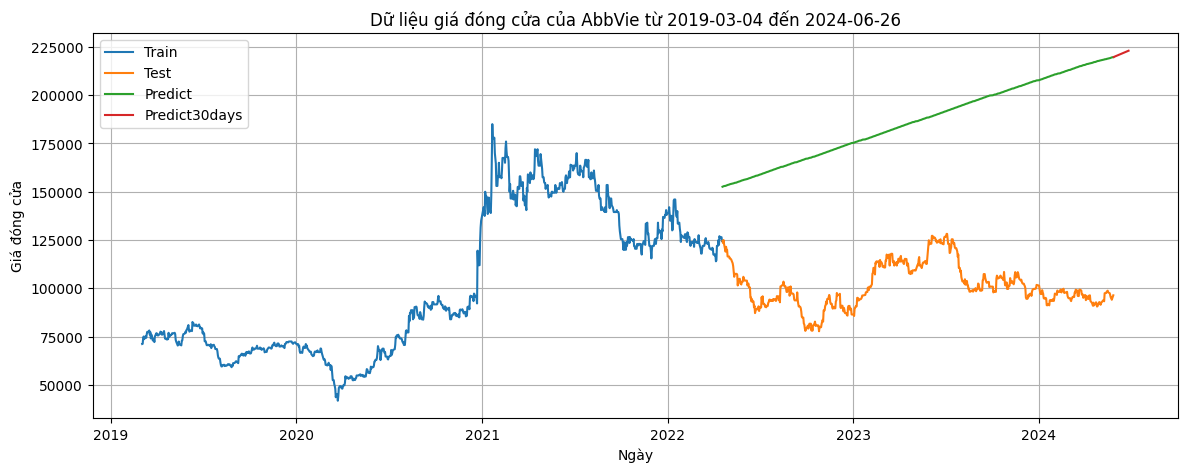

In [34]:
# Vẽ biểu đồ
plt.figure(figsize=(14, 5))

# Vẽ dữ liệu huấn luyện
plt.plot(df.index[:train_size], scaler.inverse_transform(train_data))

# Vẽ dữ liệu kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(test_data))

# Vẽ dự đoán trên tập kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(y_pred.reshape(-1, 1)))

# Vẽ dự đoán cho 30 ngày tiếp theo
plt.plot(index_next_30_days, y_next_30_days)

plt.legend(['Train', 'Test', 'Predict', 'Predict30days'])

plt.grid()
plt.title(f"Dữ liệu giá đóng cửa của AbbVie từ {df.index[0].strftime('%Y-%m-%d')} đến {index_next_30_days[-1].strftime('%Y-%m-%d')}")
plt.xlabel("Ngày")
plt.ylabel("Giá đóng cửa")
plt.show()

In [35]:
# Tạo dự đoán cho 60 ngày tiếp theo
x_next_60_days = np.array(range(last_index + 1, last_index + 61)).reshape(-1, 1)
y_next_60_days = model.predict(x_next_60_days)
y_next_60_days = scaler.inverse_transform(np.array([y_next_60_days]).reshape(-1, 1))

In [36]:
# In ra dự đoán giá đóng cửa cho 60 ngày tiếp theo
print('Dự đoán giá đóng cửa cho 60 ngày tiếp theo:')
print(y_next_60_days.flatten())

Dự đoán giá đóng cửa cho 60 ngày tiếp theo:
[219761.73116251 219873.1058989  219984.48063529 220095.85537168
 220207.23010807 220318.60484446 220429.97958085 220541.35431724
 220652.72905363 220764.10379002 220875.47852641 220986.8532628
 221098.22799919 221209.60273558 221320.97747197 221432.35220836
 221543.72694475 221655.10168114 221766.47641753 221877.85115392
 221989.22589031 222100.6006267  222211.97536309 222323.35009948
 222434.72483587 222546.09957226 222657.47430865 222768.84904504
 222880.22378143 222991.59851782 223102.97325421 223214.3479906
 223325.72272699 223437.09746338 223548.47219977 223659.84693617
 223771.22167256 223882.59640895 223993.97114534 224105.34588173
 224216.72061812 224328.09535451 224439.4700909  224550.84482729
 224662.21956368 224773.59430007 224884.96903646 224996.34377285
 225107.71850924 225219.09324563 225330.46798202 225441.84271841
 225553.2174548  225664.59219119 225775.96692758 225887.34166397
 225998.71640036 226110.09113675 226221.46587314

In [37]:
# Tạo danh sách chỉ số bắt đầu từ ngày tiếp theo trong 60 ngày tới
index_next_60_days = pd.date_range(start=next_date, periods=60).tolist()

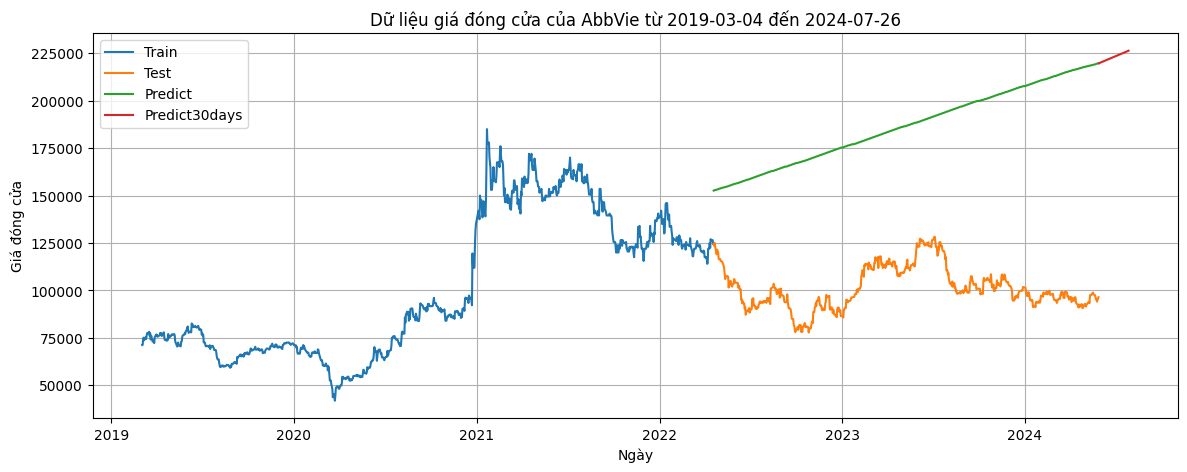

In [38]:
 # Vẽ biểu đồ
plt.figure(figsize=(14, 5))

# Vẽ dữ liệu huấn luyện
plt.plot(df.index[:train_size], scaler.inverse_transform(train_data))

# Vẽ dữ liệu kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(test_data))

# Vẽ dự đoán trên tập kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(y_pred.reshape(-1, 1)))

# Vẽ dự đoán cho 60 ngày tiếp theo
plt.plot(index_next_60_days, y_next_60_days)

plt.legend(['Train', 'Test', 'Predict', 'Predict30days'])

plt.grid()
plt.title(f"Dữ liệu giá đóng cửa của AbbVie từ {df.index[0].strftime('%Y-%m-%d')} đến {index_next_60_days[-1].strftime('%Y-%m-%d')}")
plt.xlabel("Ngày")
plt.ylabel("Giá đóng cửa")
plt.show()

In [39]:
# Tạo dự đoán cho 90 ngày tiếp theo
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)
y_next_90_days = model.predict(x_next_90_days)
y_next_90_days = scaler.inverse_transform(np.array([y_next_90_days]).reshape(-1, 1))

In [40]:
# Tạo danh sách chỉ số bắt đầu từ ngày tiếp theo trong 90 ngày tới
index_next_90_days = pd.date_range(start=next_date, periods=90).tolist()

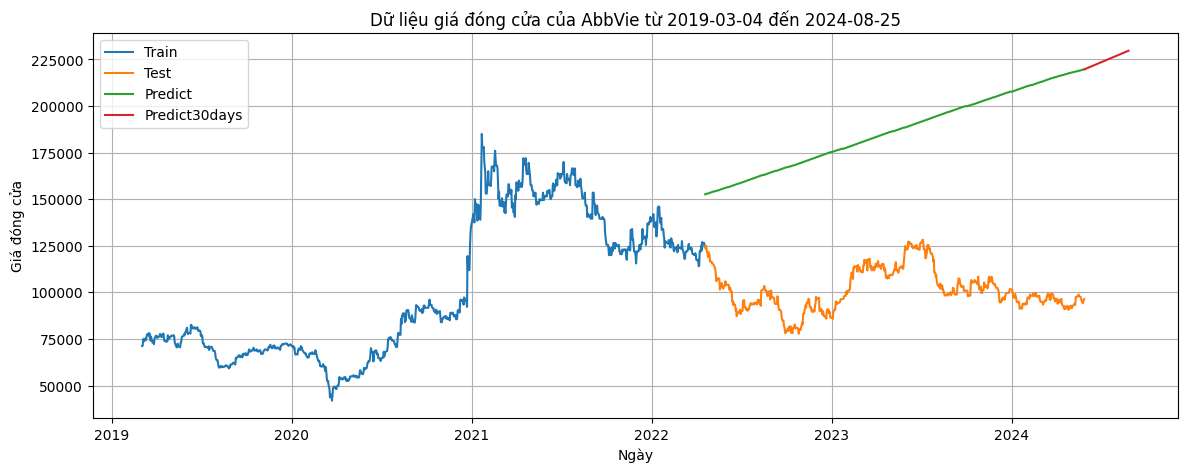

In [41]:
# Vẽ biểu đồ
plt.figure(figsize=(14, 5))

# Vẽ dữ liệu huấn luyện
plt.plot(df.index[:train_size], scaler.inverse_transform(train_data))

# Vẽ dữ liệu kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(test_data))

# Vẽ dự đoán trên tập kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(y_pred.reshape(-1, 1)))

# Vẽ dự đoán cho 90 ngày tiếp theo
plt.plot(index_next_90_days, y_next_90_days)

plt.legend(['Train', 'Test', 'Predict', 'Predict30days'])

plt.grid()
plt.title(f"Dữ liệu giá đóng cửa của AbbVie từ {df.index[0].strftime('%Y-%m-%d')} đến {index_next_90_days[-1].strftime('%Y-%m-%d')}")
plt.xlabel("Ngày")
plt.ylabel("Giá đóng cửa")
plt.show()